# Car Price Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
#load dataset
url = "car data.csv"
data = pd.read_csv(url, encoding='latin-1')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print('The shape of our features is:', data.shape)

The shape of our features is: (301, 9)


In [4]:
#missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#numerical stats
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Preprocessing

In [7]:
#Car_Name column
data['Car_Name'].value_counts()

Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3

In [8]:
# Define function to categorize Car_Name values
def categorize_car(car):
    if car == 'city' or car == 'corolla altis' or car == 'verna' or car == 'fortuner' or car == 'brio':
        return car
    else:
        return 'Other'
    
# Apply categorization function
data['Car_Name'] = data['Car_Name'].apply(categorize_car)

In [9]:
#Car_Name column
data['Car_Name'].value_counts()

Car_Name
Other            224
city              26
corolla altis     16
verna             14
fortuner          11
brio              10
Name: count, dtype: int64

In [10]:
len(data['Car_Name'].value_counts())

6

In [11]:
#Year column
data['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [12]:
data['Age'] = 2024 - data['Year']
data.drop('Year',axis=1,inplace = True)

In [13]:
#Age column
data['Age'].value_counts()

Age
9     61
8     50
10    38
7     35
11    33
12    23
13    19
14    15
16     7
15     6
18     4
19     4
21     2
17     2
6      1
20     1
Name: count, dtype: int64

In [14]:
#Fuel_Type column
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
#Seller_Type column
data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [16]:
#Transmission column
data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [17]:
data.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [18]:
data.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

# Univariate Analysis

# Scatter plots: Exploring relationships between variables

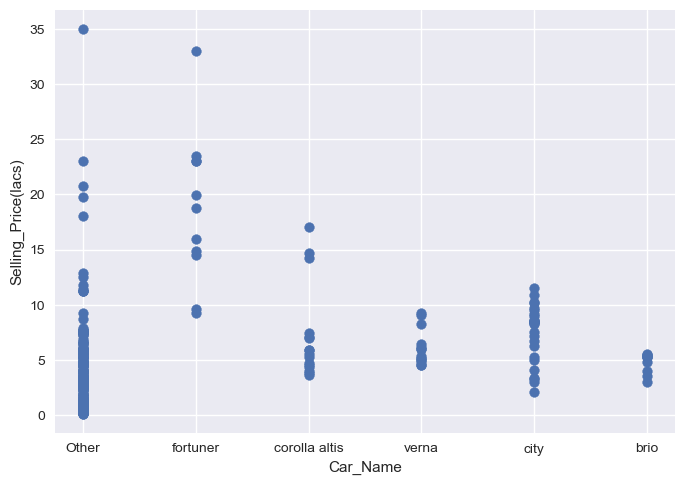

In [19]:
plt.scatter(data['Car_Name'],data['Selling_Price(lacs)'])
plt.xlabel('Car_Name')
plt.ylabel('Selling_Price(lacs)')
plt.show()

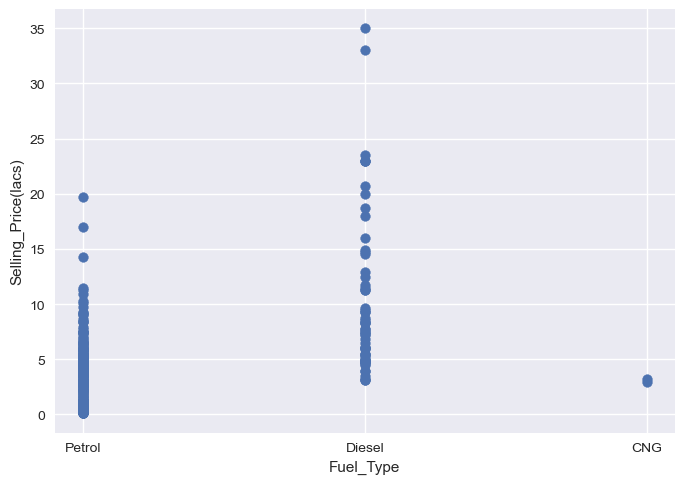

In [20]:
plt.scatter(data['Fuel_Type'],data['Selling_Price(lacs)'])
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price(lacs)')
plt.show()

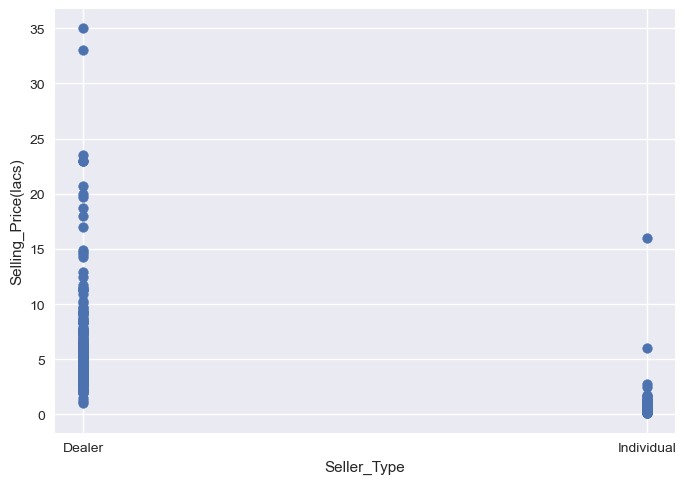

In [21]:
plt.scatter(data['Seller_Type'],data['Selling_Price(lacs)'])
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price(lacs)')
plt.show()

# Bar graphs: Comparing categorical variables

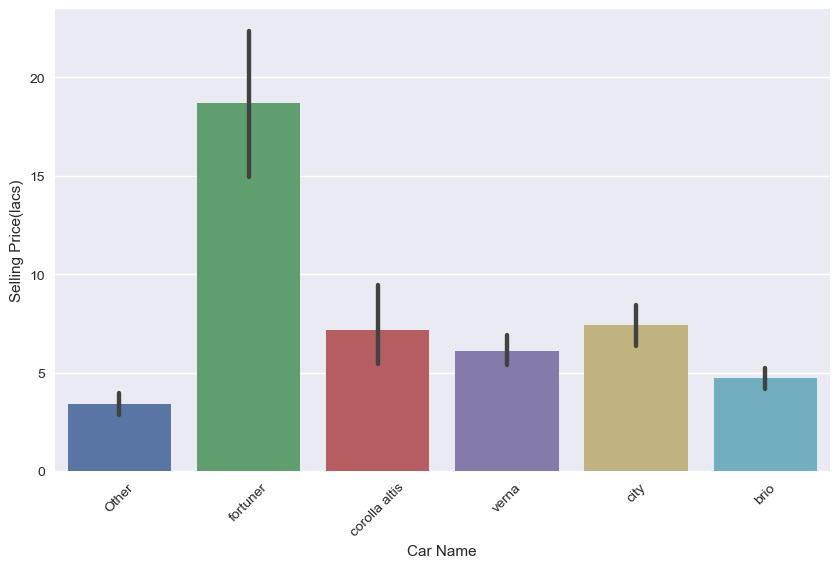

In [22]:
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=data['Car_Name'], y=data['Selling_Price(lacs)'])
plt.xticks(rotation=45)  # Rotate the y-axis labels

plt.xlabel('Car Name')
plt.ylabel('Selling Price(lacs)')
plt.show()

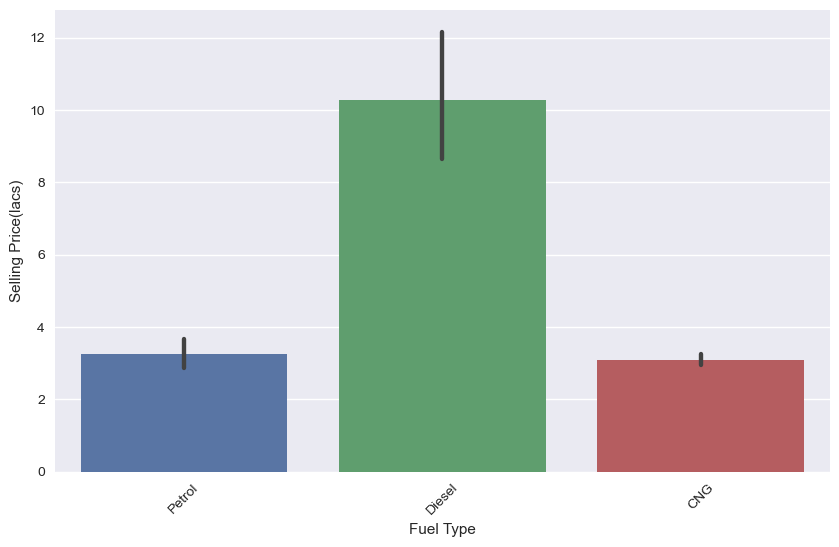

In [23]:
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=data['Fuel_Type'], y=data['Selling_Price(lacs)'])
plt.xticks(rotation=45)  # Rotate the y-axis labels

plt.xlabel('Fuel Type')
plt.ylabel('Selling Price(lacs)')
plt.show()

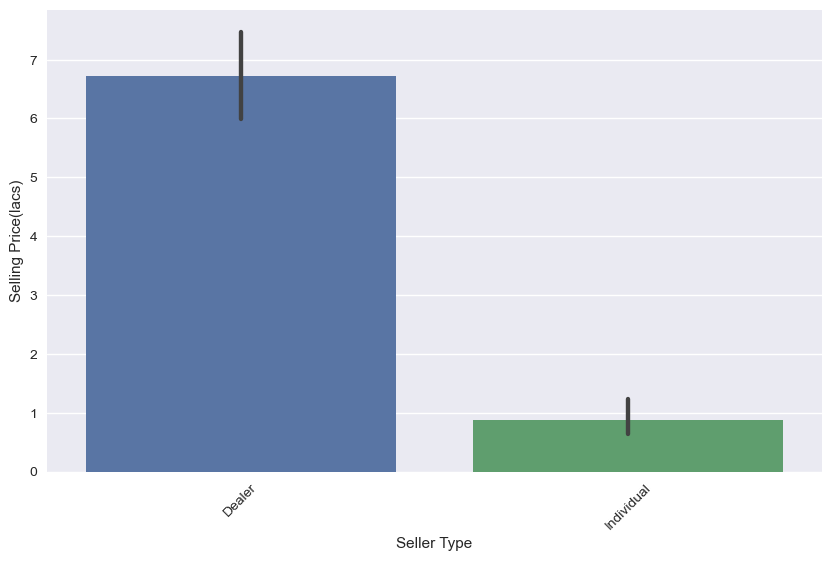

In [24]:
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=data['Seller_Type'], y=data['Selling_Price(lacs)'])
plt.xticks(rotation=45)  # Rotate the y-axis labels

plt.xlabel('Seller Type')
plt.ylabel('Selling Price(lacs)')
plt.show()

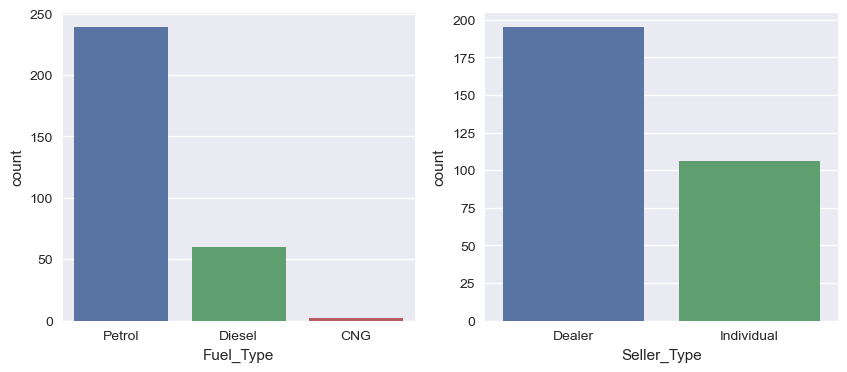

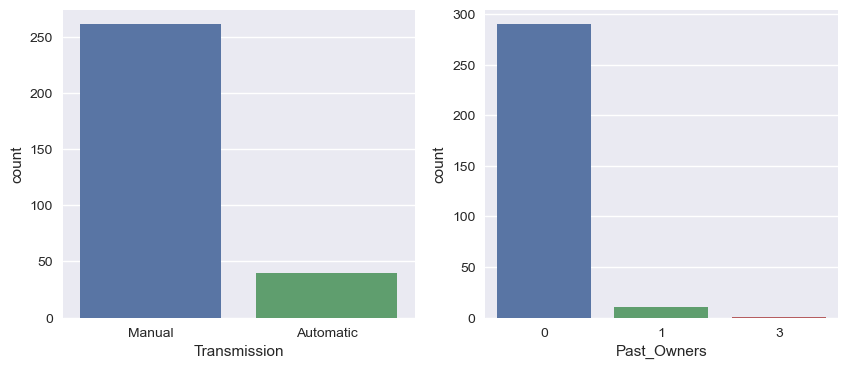

In [25]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    plt.show()

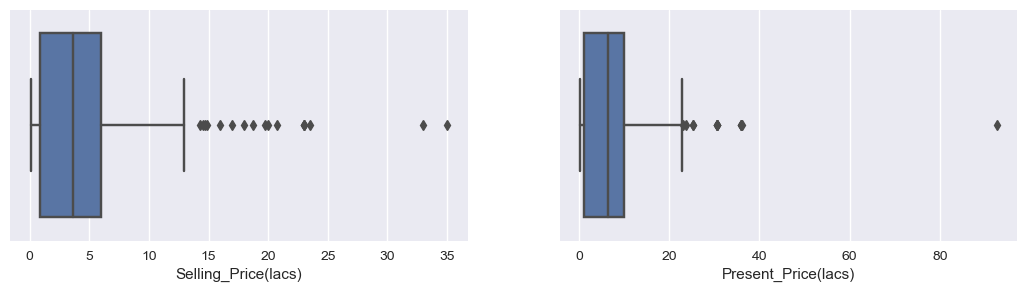

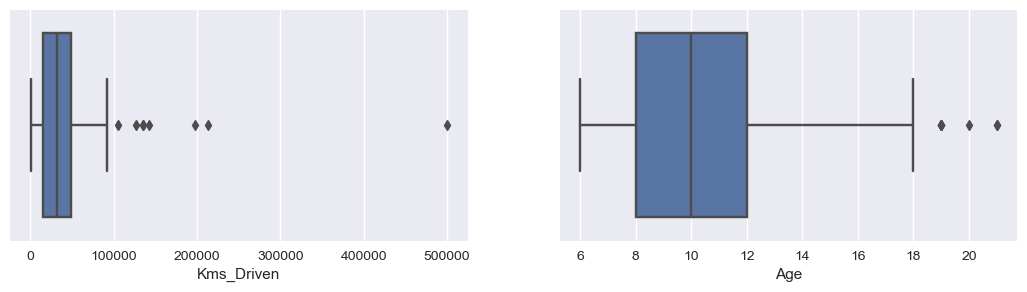

In [26]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.show()

In [27]:
data[data['Present_Price(lacs)'] > data['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,Other,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [28]:
data[data['Selling_Price(lacs)'] > data['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,9
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,Other,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [29]:
data[data['Kms_Driven'] > data['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,Other,3.49,13.46,197176,Diesel,Dealer,Manual,0,19
179,Other,0.31,1.05,213000,Petrol,Individual,Manual,0,14
196,Other,0.17,0.52,500000,Petrol,Individual,Automatic,0,16


In [30]:
data.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,Other,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,Other,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,Other,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,Other,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,Other,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [31]:
print('The shape of our features is:', data.shape)

The shape of our features is: (301, 9)


# Data Preparation

In [32]:
data = pd.get_dummies(data = data)

In [33]:
data.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Car_Name_Other,Car_Name_brio,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,True,False,False,False,False,False,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,11,True,False,False,False,False,False,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,7,True,False,False,False,False,False,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,13,True,False,False,False,False,False,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,10,True,False,False,False,False,False,False,True,False,True,False,False,True


In [34]:
data.columns

Index(['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Past_Owners', 'Age', 'Car_Name_Other', 'Car_Name_brio',
       'Car_Name_city', 'Car_Name_corolla altis', 'Car_Name_fortuner',
       'Car_Name_verna', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

# Bivariate/Multi-Variate Analysis

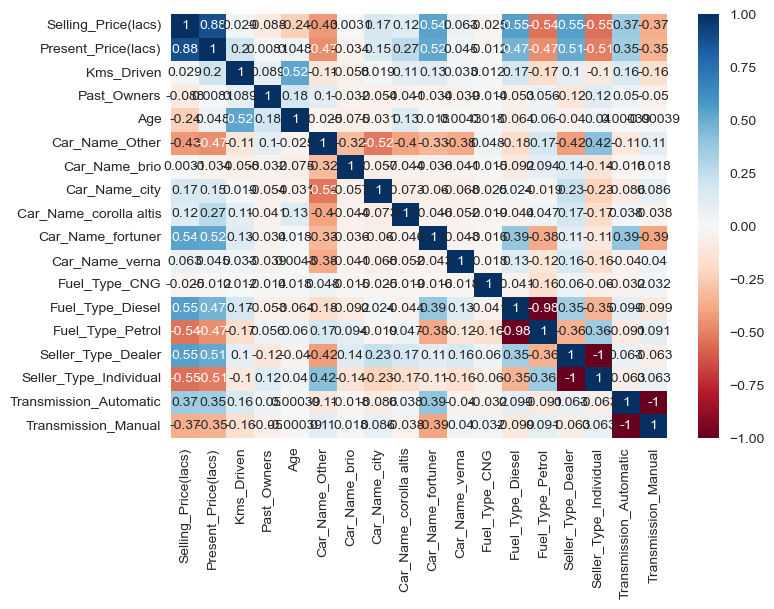

In [35]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [36]:
data.corr()['Selling_Price(lacs)']

Selling_Price(lacs)       1.000000
Present_Price(lacs)       0.878983
Kms_Driven                0.029187
Past_Owners              -0.088344
Age                      -0.236141
Car_Name_Other           -0.431272
Car_Name_brio             0.003058
Car_Name_city             0.167118
Car_Name_corolla altis    0.117753
Car_Name_fortuner         0.538261
Car_Name_verna            0.062962
Fuel_Type_CNG            -0.025164
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Dealer        0.550724
Seller_Type_Individual   -0.550724
Transmission_Automatic    0.367128
Transmission_Manual      -0.367128
Name: Selling_Price(lacs), dtype: float64

# Train-Test Split

In [37]:
# Splitting the dataset into features (x) and target variable (y).
x = data.drop('Selling_Price(lacs)', axis=1)  # Features: 'x' contains all columns except 'Selling_Price(lacs)'
y = data['Selling_Price(lacs)']  # Target variable: 'y' contains only the 'Selling_Price(lacs)' column

In [38]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [39]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (240, 17)
Training Labels Shape: (240,)
Testing Features Shape: (61, 17)
Testing Labels Shape: (61,)


# Random Forest Regressor

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [500, 1000, 100],
    'max_depth': [4, 9, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Instantiate the grid search model with Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search_rf.fit(x_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest Regressor:", best_params_rf)

Best Hyperparameters for Random Forest Regressor: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [41]:
# Train the model with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params_rf)
rf_model_tuned.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, max_features='log2', n_estimators=1000)

In [42]:
# Make predictions using the testing set
y_pred = rf_model_tuned.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

# The coefficient of determination (R-squared)
r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared): %.2f" % r_squared)

Mean squared error: 1.18
Coefficient of determination (R-squared): 0.95


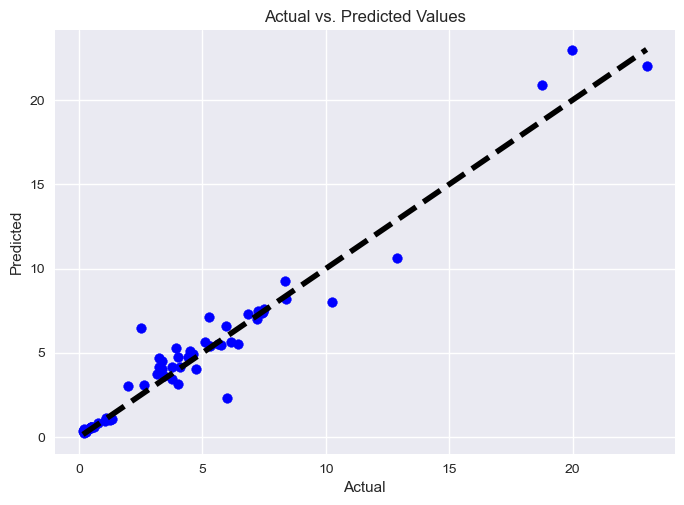

In [44]:
def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure()
    plt.scatter(actual, predicted, color='blue')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred, "Actual vs. Predicted Values")

In [45]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.660511901239114


In [48]:
# The input features include age, kilometers driven, and binary variables for categorical features.
# Binary variables represent car-specific attributes like fuel type, seller type, and transmission type.
predict_value = rf_model_tuned.predict([[4.15, 5200, 0, 13, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]])

# Print the predicted selling price in lacs
print('Selling_Price(lacs):', predict_value)

Selling_Price(lacs): [2.89196432]


In [49]:
import pickle
with open('forest.pickle', 'wb') as file:
    pickle.dump(rf_model_tuned, file)